In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

In [2]:
# inputing and summarizing the data
dataframe_raw = pd.read_csv("DF_Raw_Data.csv")
dataframe_stdev = pd.read_csv("DF_Rolling_Stdev.csv")
print(dataframe_raw.describe())
print(dataframe_raw.info())
print(dataframe_stdev.describe())
print(dataframe_stdev.info())

       Volumetric Flow Meter 1  Volumetric Flow Meter 2  Pump Speed (RPM)  \
count              2453.000000              2453.000000       2453.000000   
mean                 41.802629                41.796702         90.796576   
std                   3.656576                 3.654873         10.217885   
min                   0.000000                 0.000000          0.000000   
25%                  41.050000                41.000000         85.000000   
50%                  42.100000                42.140000         91.000000   
75%                  43.140000                43.130000         97.000000   
max                  45.900000                45.840000        124.000000   

       Pump Torque   Ambient Temperature  Horse Power  Pump Efficiency  \
count   2453.000000          2453.000000  2453.000000      2453.000000   
mean     202.851610            50.226661     3.540897        76.015149   
std       22.683977             5.298203     0.579055         6.651633   
min       

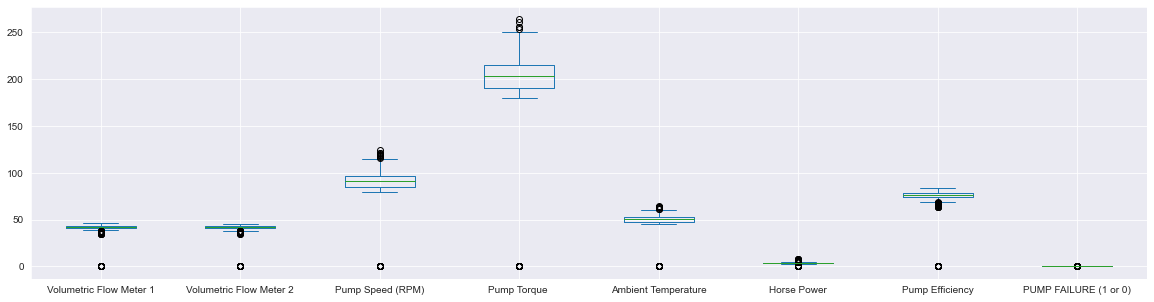

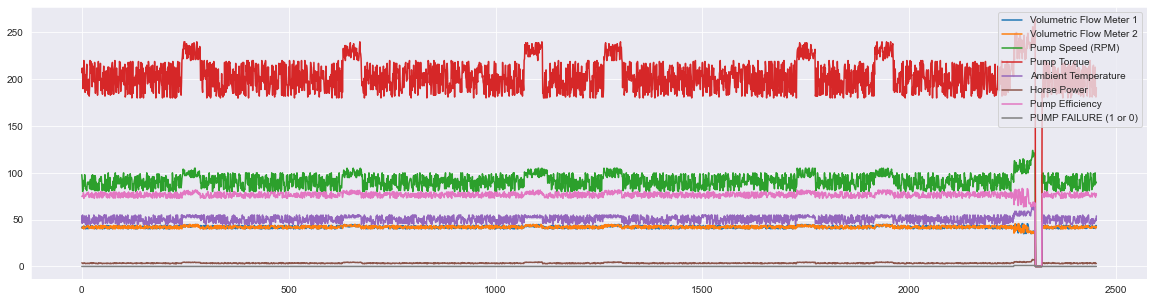

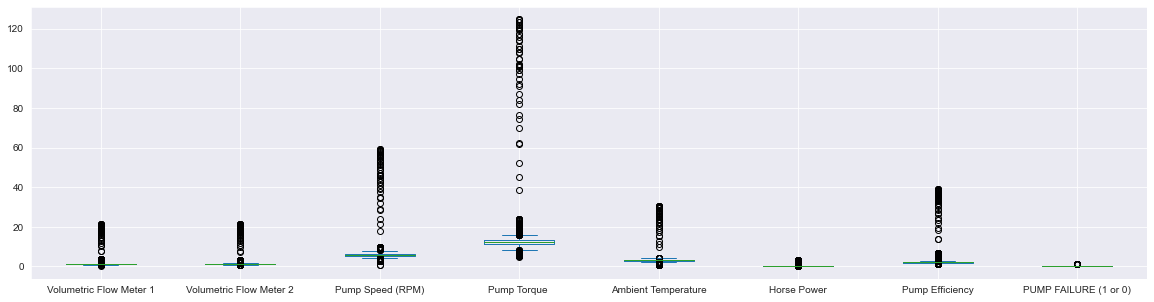

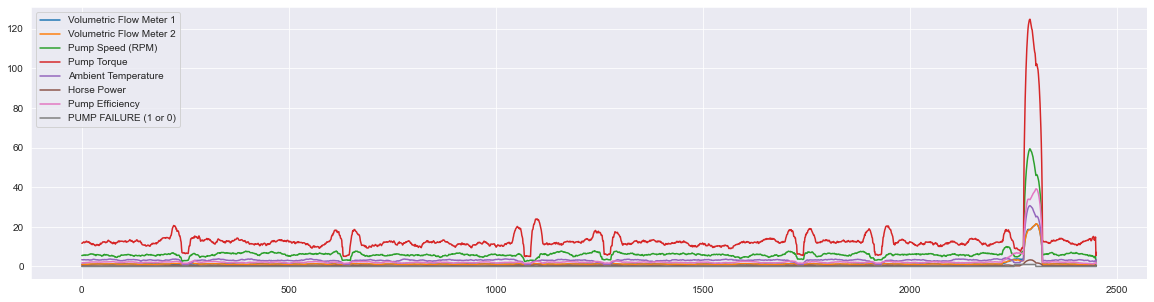

In [3]:
#box plots and line plots for the raw data and standard deviation
dataframe_raw.plot(kind='box')
plt.show()

dataframe_raw.plot(kind='line')
plt.show()

dataframe_stdev.plot(kind='box')
plt.show()

dataframe_stdev.plot(kind='line')
plt.show()

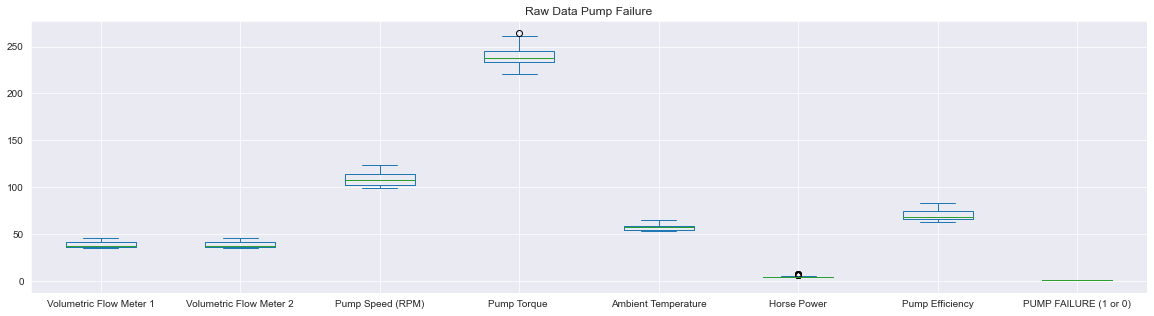

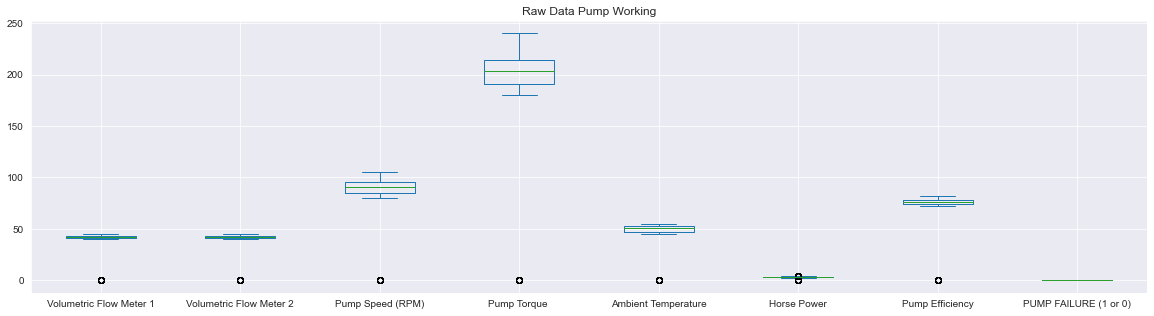

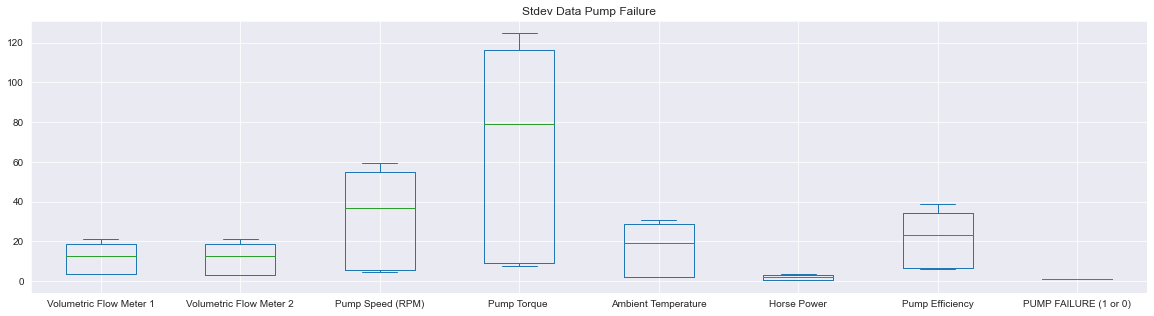

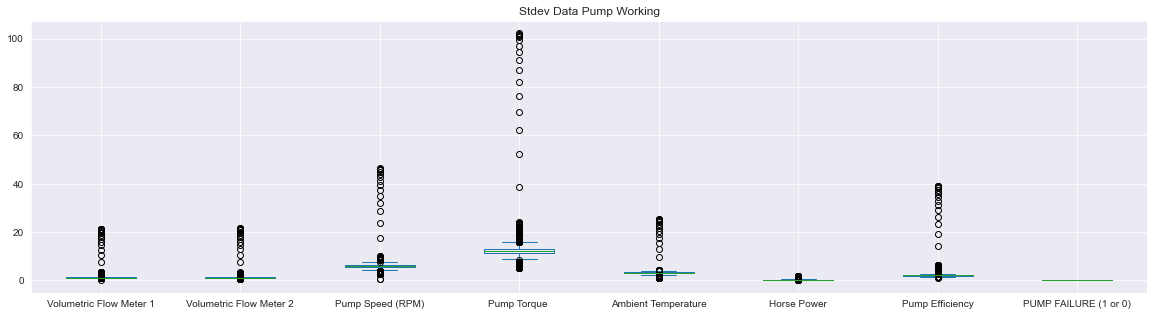

In [4]:
# Examining box plots dependent on status of the pump
pump_failure = dataframe_raw['PUMP FAILURE (1 or 0)']== 1
dataframe_raw_failure = dataframe_raw[pump_failure]
dataframe_raw_failure.plot(kind='box')
plt.title("Raw Data Pump Failure")
plt.show()

pump_working = dataframe_raw['PUMP FAILURE (1 or 0)']== 0
dataframe_raw_working = dataframe_raw[pump_working]
dataframe_raw_working.plot(kind='box')
plt.title("Raw Data Pump Working")
plt.show()

pump_failure = dataframe_stdev['PUMP FAILURE (1 or 0)']== 1
dataframe_stdev_failure = dataframe_stdev[pump_failure]
dataframe_stdev_failure.plot(kind='box')
plt.title("Stdev Data Pump Failure")
plt.show()

pump_working = dataframe_stdev['PUMP FAILURE (1 or 0)']== 0
dataframe_stdev_working = dataframe_stdev[pump_working]
dataframe_stdev_working.plot(kind='box')
plt.title("Stdev Data Pump Working")
plt.show()

In [5]:
q1 = dataframe_raw.quantile(0.25)
q3 = dataframe_raw.quantile(0.75)
iqr = q3-q1
print(iqr)

Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
PUMP FAILURE (1 or 0)       0.00
dtype: float64


In [6]:
Lower_Limit = q1 - 1.5 * iqr
Upper_Limit = q3 + 1.5 * iqr

outliers = dataframe_raw[((dataframe_raw < Lower_Limit) | (dataframe_raw > Upper_Limit)).any(axis=1)]
pct_not_outliers = len(outliers.index)/len(dataframe_raw.index)
print(pct_not_outliers)

0.03872808805544232


C:\Users\Jen_H\AppData\Local\Temp/ipykernel_39704/2469411905.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = dataframe_raw[((dataframe_raw < Lower_Limit) | (dataframe_raw > Upper_Limit)).any(axis=1)]


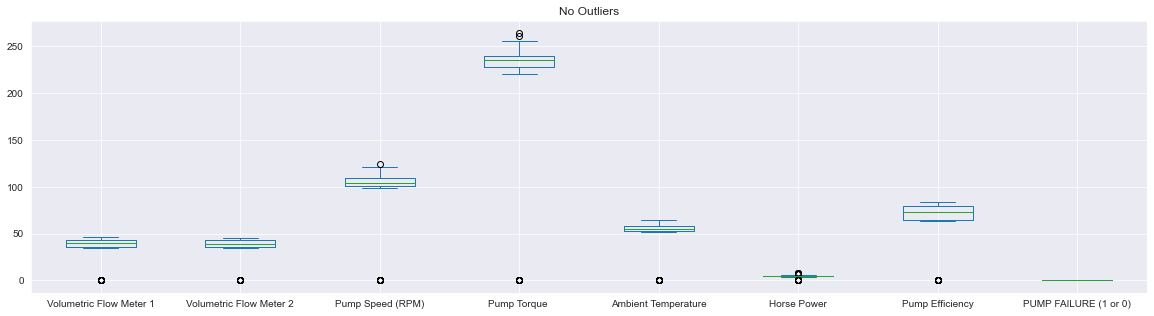

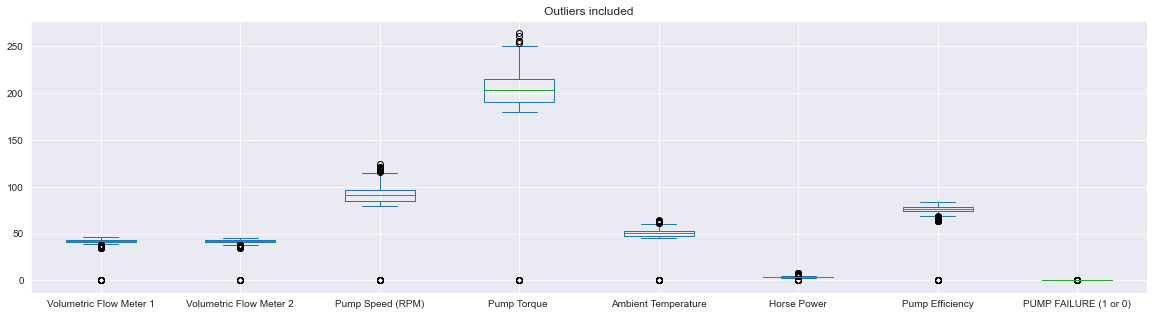

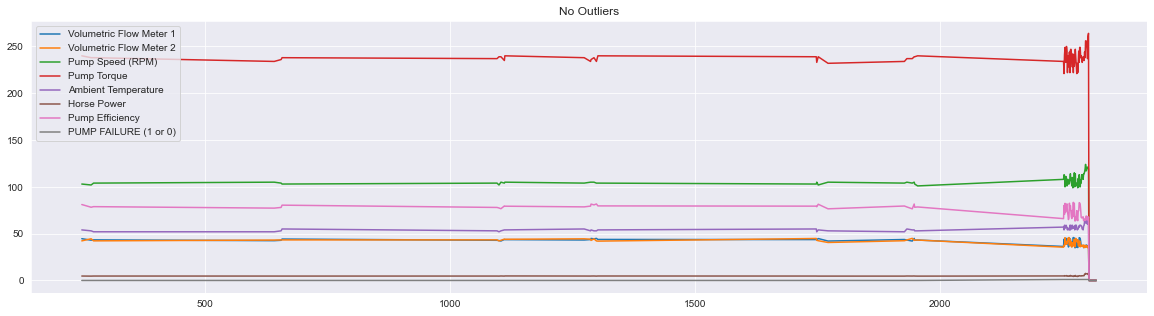

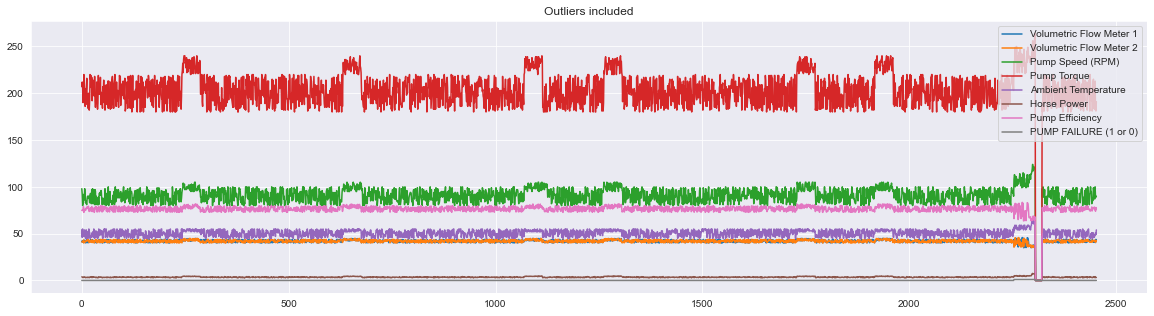

In [7]:
outliers.plot(kind = 'box')
plt.title('No Outliers')
plt.show()

dataframe_raw.plot(kind = 'box')
plt.title('Outliers included')
plt.show()

outliers.plot(kind = 'line')
plt.title('No Outliers')
plt.show()

dataframe_raw.plot(kind = 'line')
plt.title('Outliers included')
plt.show()

C:\Users\Jen_H\AppData\Local\Temp/ipykernel_39704/1435423625.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  no_outliers = dataframe_raw[~((dataframe_raw < Lower_Limit)|(dataframe_raw> Upper_Limit)).any(axis=1)]


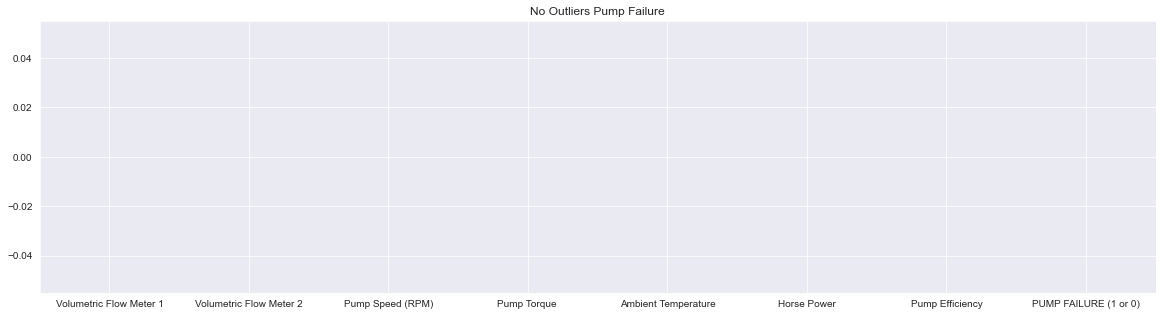

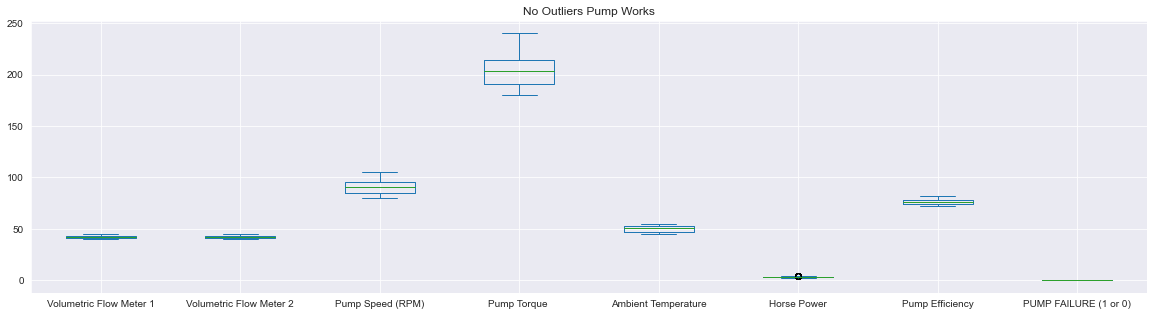

In [8]:
# Pump Failure box plot does not have any data to show when all outliers are removed this way 
# because the pump failure causes all values to drop to 0 which means that every value is an outlier

no_outliers = dataframe_raw[~((dataframe_raw < Lower_Limit)|(dataframe_raw> Upper_Limit)).any(axis=1)]
no_outliers.shape
pump_nooutliers_failure = no_outliers['PUMP FAILURE (1 or 0)']== 1
no_outliers_failure = no_outliers[pump_nooutliers_failure]
no_outliers_failure.plot(kind='box')
plt.title("No Outliers Pump Failure")
plt.show()

pump_nooutliers_works = no_outliers['PUMP FAILURE (1 or 0)']== 0
no_outliers_works = no_outliers[pump_nooutliers_works]
no_outliers_works.plot(kind='box')
plt.title("No Outliers Pump Works")
plt.show()

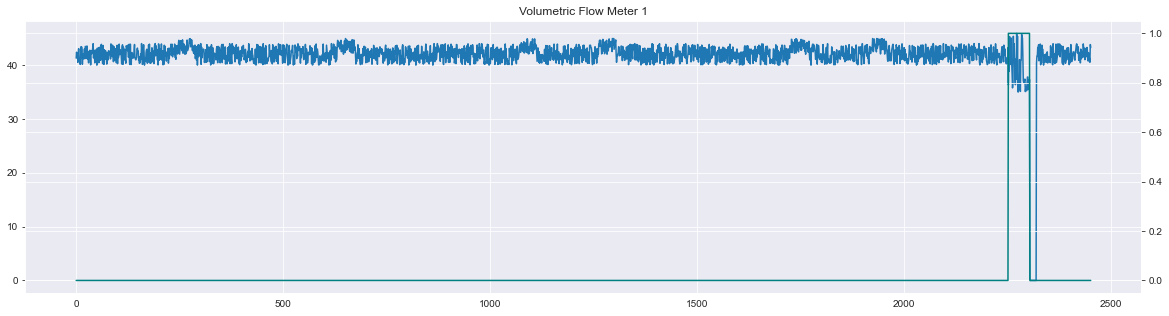

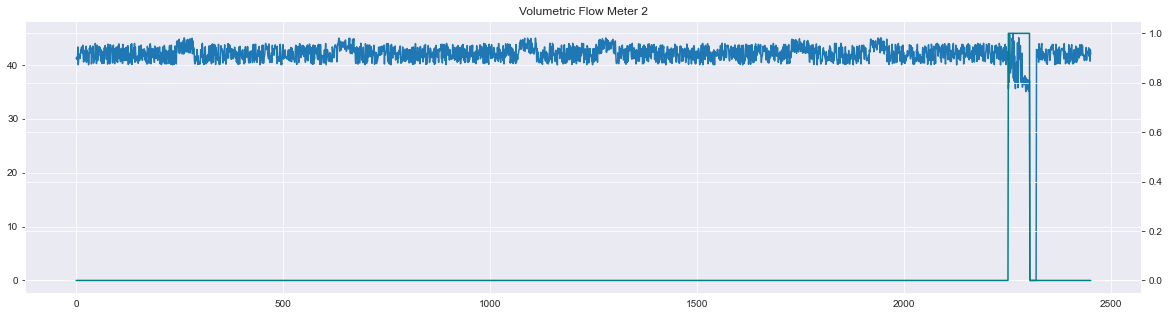

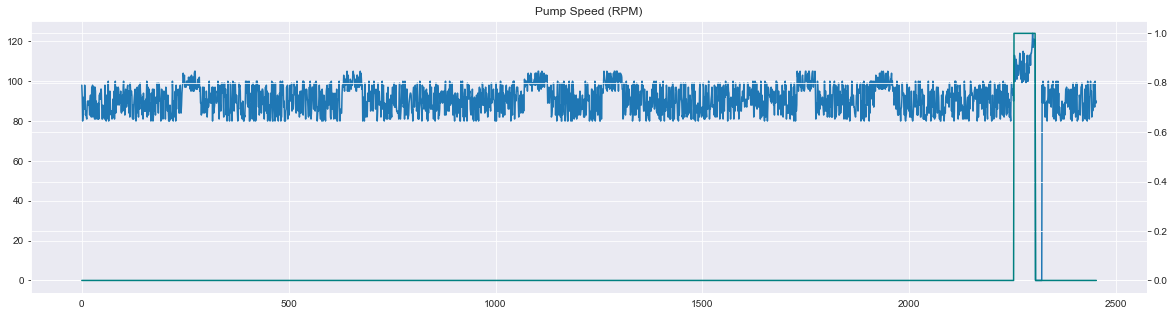

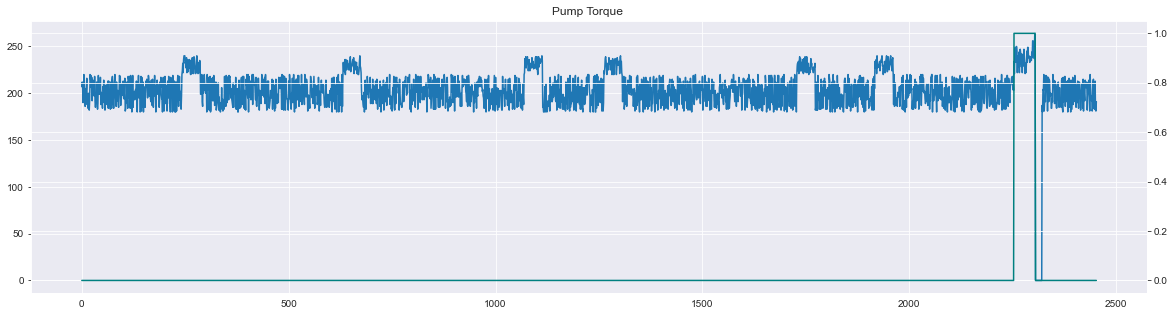

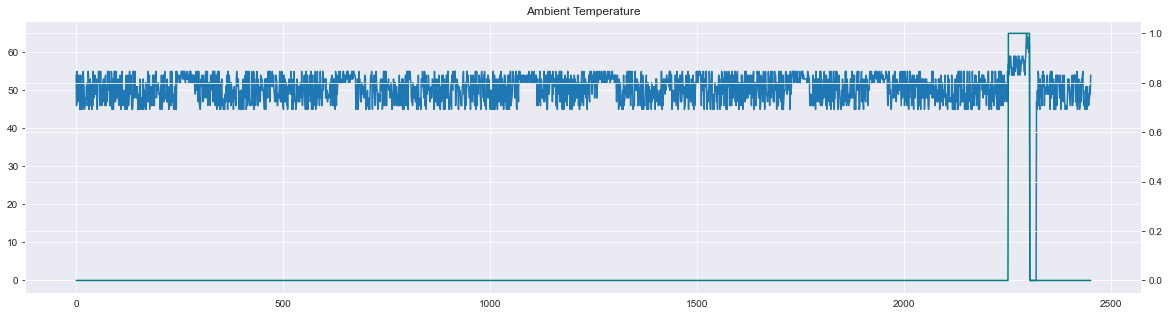

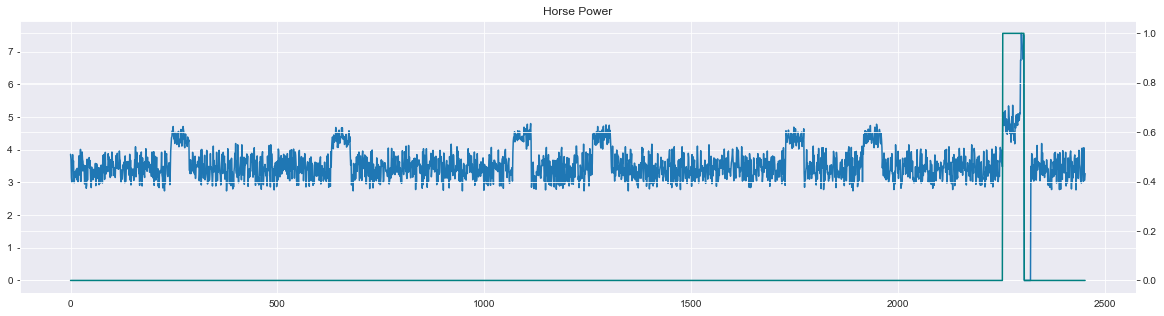

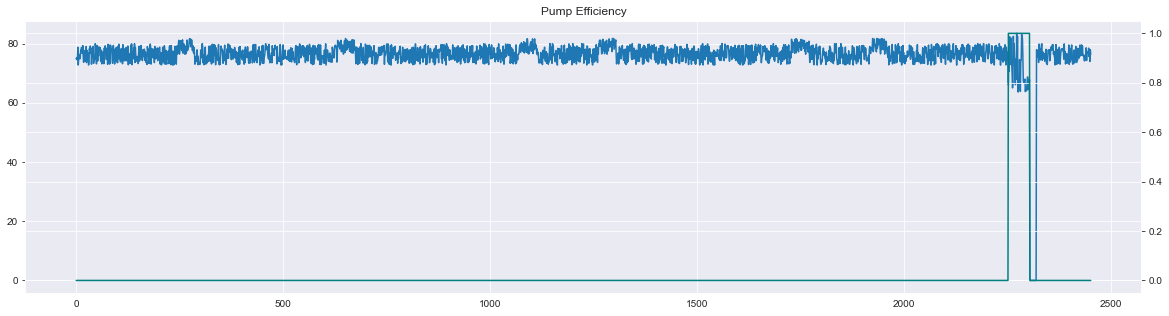

In [9]:
ListOfVariables = ['Volumetric Flow Meter 1',
       'Volumetric Flow Meter 2', 'Pump Speed (RPM)', 'Pump Torque ',
       'Ambient Temperature', 'Horse Power', 'Pump Efficiency']

for item in ListOfVariables:
    first_axis = dataframe_raw[item].plot(kind = 'line')
    second_axis = first_axis.twinx()
    second_axis.plot(dataframe_raw['PUMP FAILURE (1 or 0)'], color= 'teal')
    plt.title(item)
    plt.show()

<AxesSubplot:>

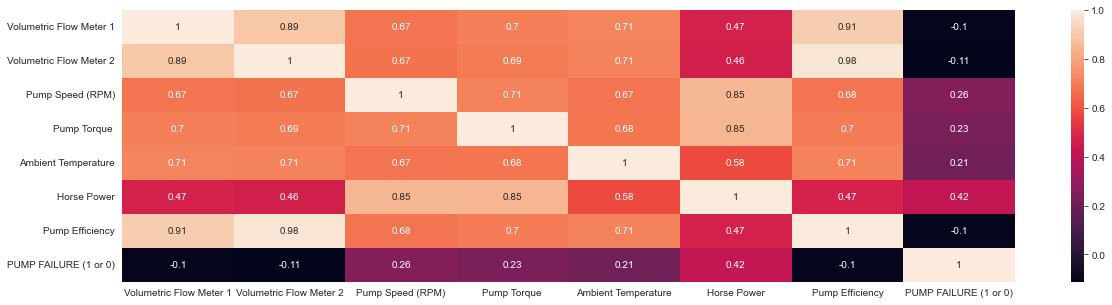

In [11]:
# Pump failure has a positive corelation with horse power
correlated_df = dataframe_raw.corr()
sns.heatmap(correlated_df, annot=True)

In [12]:
print(dataframe_raw.corr())

                         Volumetric Flow Meter 1  Volumetric Flow Meter 2  \
Volumetric Flow Meter 1                 1.000000                 0.893058   
Volumetric Flow Meter 2                 0.893058                 1.000000   
Pump Speed (RPM)                        0.674691                 0.671896   
Pump Torque                             0.700425                 0.692183   
Ambient Temperature                     0.713913                 0.710423   
Horse Power                             0.470081                 0.462087   
Pump Efficiency                         0.913014                 0.980144   
PUMP FAILURE (1 or 0)                  -0.102508                -0.112115   

                         Pump Speed (RPM)  Pump Torque   Ambient Temperature  \
Volumetric Flow Meter 1          0.674691      0.700425             0.713913   
Volumetric Flow Meter 2          0.671896      0.692183             0.710423   
Pump Speed (RPM)                 1.000000      0.711037           

,Volumetric Flow Meter 1,Volumetric Flow Meter 2,Pump Speed (RPM),Pump Torque,Ambient Temperature,Horse Power,Pump Efficiency,PUMP FAILURE (1 or 0)
Volumetric Flow Meter 1,1.000000,0.893058,0.674691,0.700425,0.713913,0.470081,0.913014,-0.102508
Volumetric Flow Meter 2,0.893058,1.000000,0.671896,0.692183,0.710423,0.462087,0.980144,-0.112115
Pump Speed (RPM),0.674691,0.671896,1.000000,0.711037,0.674645,0.848416,0.677924,0.260016
Pump Torque,0.700425,0.692183,0.711037,1.000000,0.680159,0.847884,0.698527,0.233193
Ambient Temperature,0.713913,0.710423,0.674645,0.680159,1.000000,0.579374,0.712727,0.207946
Horse Power,0.470081,0.462087,0.848416,0.847884,0.579374,1.000000,0.471731,0.421694
Pump Efficiency,0.913014,0.980144,0.677924,0.698527,0.712727,0.471731,1.000000,-0.102696
PUMP FAILURE (1 or 0),-0.102508,-0.112115,0.260016,0.233193,0.207946,0.421694,-0.102696,1.000000


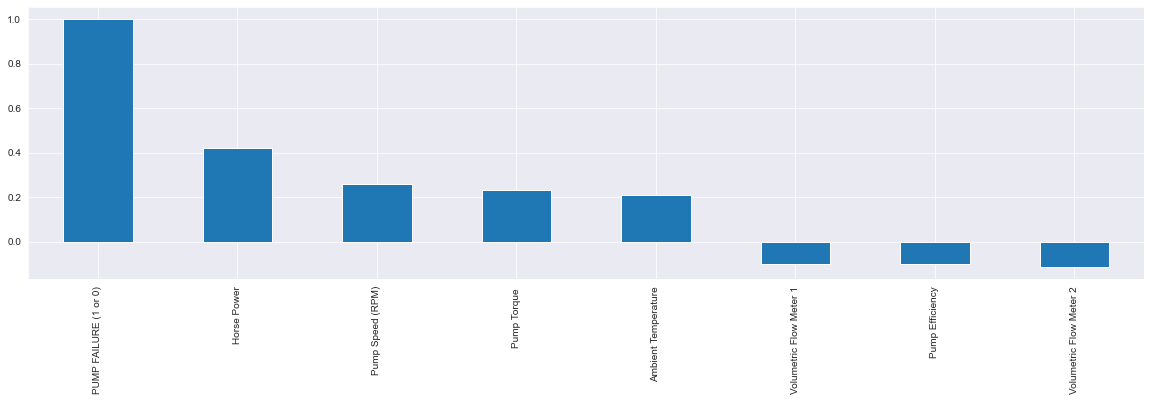

In [22]:
correlated_df['PUMP FAILURE (1 or 0)'].sort_values(ascending=False).plot(kind='bar')
plt.show()

---

<AxesSubplot:>

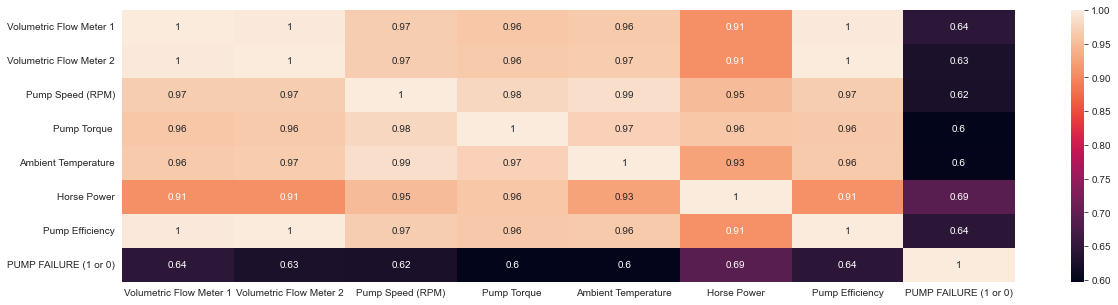

In [24]:
correlated_stdev_df = dataframe_stdev.corr()
sns.heatmap(correlated_stdev_df, annot=True)

In [13]:
#Dataframe_Raw
independent_variables = dataframe_raw[['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)', 'Pump Torque ', 'Ambient Temperature', 'Horse Power', 'Pump Efficiency']]
dependent_variable = dataframe_raw['PUMP FAILURE (1 or 0)']

independent_variables = sm.add_constant(independent_variables)
regression_model = sm.OLS(dependent_variable, independent_variables).fit()
print(regression_model.summary())

                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.362
Model:                               OLS   Adj. R-squared:                  0.360
Method:                    Least Squares   F-statistic:                     197.9
Date:                   Tue, 14 Nov 2023   Prob (F-statistic):          5.58e-233
Time:                           14:44:09   Log-Likelihood:                 1823.0
No. Observations:                   2453   AIC:                            -3630.
Df Residuals:                       2445   BIC:                            -3583.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

C:\Users\Jen_H\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
#Dataframe_Stdev
independent_variables_std = dataframe_stdev[['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)', 'Pump Torque ', 'Ambient Temperature', 'Horse Power', 'Pump Efficiency']]
dependent_variable_std = dataframe_stdev['PUMP FAILURE (1 or 0)']

independent_variables_std = sm.add_constant(independent_variables_std)
regression_model_std = sm.OLS(dependent_variable_std, independent_variables_std).fit()
print(regression_model_std.summary())

                              OLS Regression Results                             
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.778
Model:                               OLS   Adj. R-squared:                  0.778
Method:                    Least Squares   F-statistic:                     1225.
Date:                   Tue, 14 Nov 2023   Prob (F-statistic):               0.00
Time:                           14:44:43   Log-Likelihood:                 3117.4
No. Observations:                   2452   AIC:                            -6219.
Df Residuals:                       2444   BIC:                            -6172.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

C:\Users\Jen_H\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


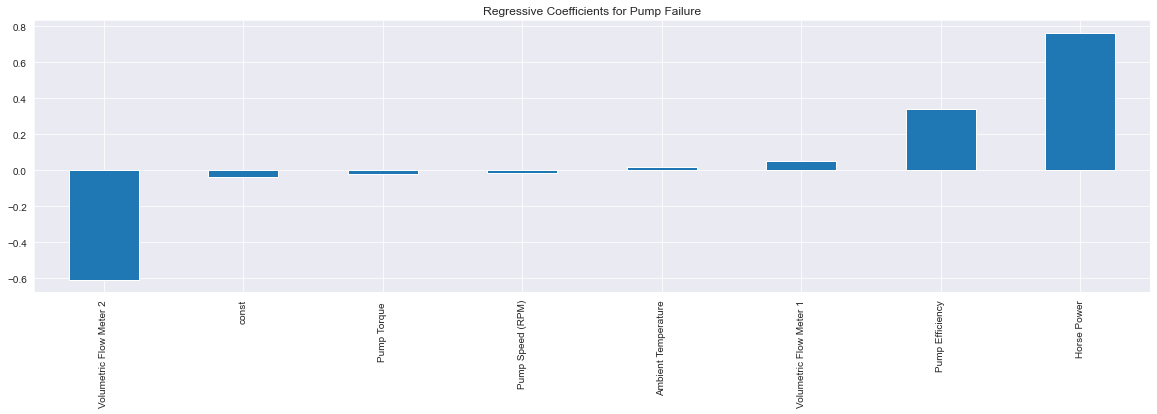

In [15]:
coefficients = regression_model_std.params
coefficients.sort_values(ascending = True).plot(kind = 'bar')
plt.title('Regressive Coefficients for Pump Failure')
plt.show()

In [16]:
dataframe_stdev['Prediction'] = regression_model_std.predict(independent_variables_std)


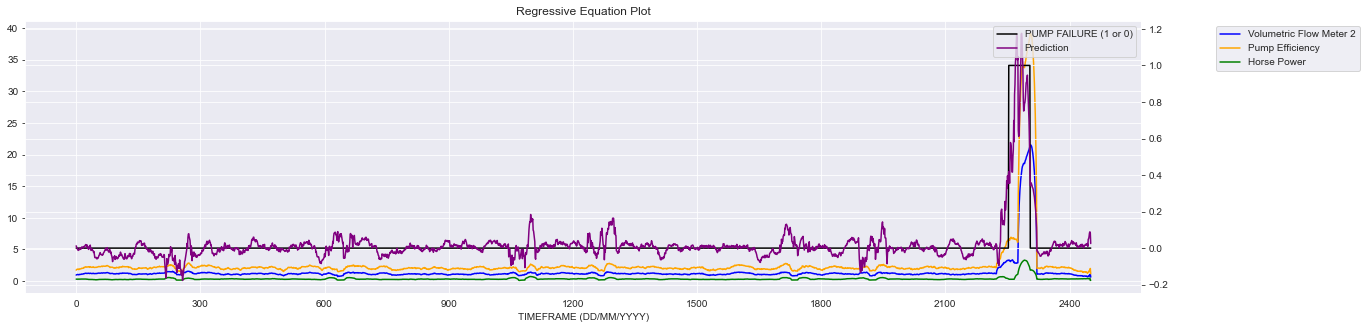

In [17]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.set_title('Regressive Equation Plot')
ax.set_xlabel('TIMEFRAME (DD/MM/YYYY)')
ax.plot(dataframe_stdev['Volumetric Flow Meter 2'], color = 'blue')
ax.plot(dataframe_stdev['Pump Efficiency'], color = 'orange')
ax.plot(dataframe_stdev['Horse Power'], color = 'green')
ax2.plot(dataframe_stdev['PUMP FAILURE (1 or 0)'], color = 'black')
ax2.plot(dataframe_stdev['Prediction'], color = 'purple')
ax.legend(['Volumetric Flow Meter 2', 'Pump Efficiency', 'Horse Power'], loc='upper right', bbox_to_anchor=(1.2, 1))
ax2.legend(['PUMP FAILURE (1 or 0)', 'Prediction'], loc='upper right')
ax.set_xticks(dataframe_stdev.index)
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.show()